<a href="https://colab.research.google.com/github/aka1Neto/UEA/blob/main/Eliminando_Quadrados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jogo

Ao lançar 240 quadradinhos aleatoriamente sobre uma
mesa e retirar todos os que ficaram com a face marrom
para cima, quantos restarão depois do primeiro lance?
Repetindo o procedimento com os quadradinhos que
sobraram, quantos restarão depois do segundo lance?
E depois do quinto? Existe alguma relação entre esses
valores?



In [ ]:
import ipywidgets as widgets;
from ipywidgets.widgets.widget_button import ButtonStyle
from ipywidgets import GridspecLayout, GridBox, Layout, Button;
import random;
import matplotlib.pyplot as plt;
import numpy as np;

In [ ]:
from ipywidgets.widgets.trait_types import Color
def fazer_cartoes(row, column):
  grid = GridspecLayout(row, column);
  for i in range(row):
    for j in range(column):
        grid[i, j] = Button(style=ButtonStyle(button_color = 'green') , layout=Layout(height='auto', width='auto'));
  return grid;

In [ ]:
jogar = Button(button_style= 'primary', layout=Layout(height='auto', width='auto'), description= 'Jogar Cartas');
start = Button(button_style='success', description='Começar Jogo', );

In [ ]:
def eliminar_quadrados(grid, row, column, plays):
  for play in range(plays):
    i = random.randrange(0,row);
    j = random.randrange(0,column);
    while grid[i, j].style.button_color!='green':
      i = random.randrange(0,row);
      j = random.randrange(0,column);
    grid[i, j].style=ButtonStyle(button_color='saddlebrown');

In [ ]:
tabela1 =[['Lançamento', 'Quadrados Restantes']];
tabela2 =[['Lançamento', 'Quadrados Restantes', 'Quociente']];
tabela3 =[['Lançamento', 'Q(n) = 240×b^n']];
linhas = int(input('Quantas linhas?'));
colunas = int(input('Quantas colunas?'));
cartoes = fazer_cartoes(linhas, colunas);
num_cartoes = linhas*colunas;
cartoes_total = num_cartoes;
tabela1.append([0, num_cartoes]);
tabela2.append([0, num_cartoes, num_cartoes]);
tabela3.append([0, num_cartoes*(0.5**0)]);
jogadas = int(input('Quantas jogadas?'));
for jogada in range(1,jogadas+1):
  eliminados = random.randrange(0, num_cartoes);
  eliminar_quadrados(cartoes, linhas, colunas, eliminados);
  display(cartoes);
  quociente = num_cartoes/(num_cartoes-jogada);
  num_cartoes = num_cartoes - eliminados;
  funcao = cartoes_total*(0.5**jogada);
  tabela1.append([jogada, num_cartoes]);
  tabela2.append([jogada, num_cartoes, quociente]);
  tabela3.append([jogada, funcao]);
  input('Continue');
print("Jogo Terminado");

Quantas linhas?5
Quantas colunas?5
Quantas jogadas?4


GridspecLayout(children=(Button(layout=Layout(grid_area='widget001', height='auto', width='auto'), style=Butto…

Continue


GridspecLayout(children=(Button(layout=Layout(grid_area='widget001', height='auto', width='auto'), style=Butto…

Continue


GridspecLayout(children=(Button(layout=Layout(grid_area='widget001', height='auto', width='auto'), style=Butto…

Continue


GridspecLayout(children=(Button(layout=Layout(grid_area='widget001', height='auto', width='auto'), style=Butto…

Continue
Jogo Terminado


# Preenchendo as tabelas e os gráficos

In [ ]:
array1=np.array(tabela1[1:]);
array2=np.array(tabela2[1:]);
array3=np.array(tabela3[1:]);

Preencha a tabela de acordo com os valores obtidos ao
jogar, contar e descartar os quadradinhos.

In [ ]:
tabela1

[['Lançamento', 'Quadrados Restantes'],
 [0, 25],
 [1, 16],
 [2, 8],
 [3, 3],
 [4, 2]]

Represente os valores da tabela 1 em um plano cartesiano i×Qi

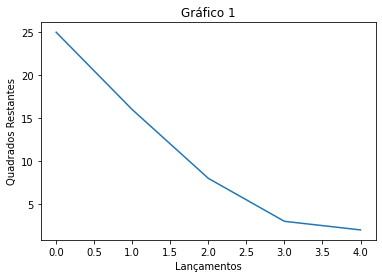

In [ ]:
graf1 = plt.subplot();
graf1.plot(array1[:,0], array1[:,1]);
graf1.set(title='Gráfico 1', xlabel='Lançamentos',ylabel='Quadrados Restantes');

Complete a tabela 2 com os dados obtidos no experimento:

In [ ]:
tabela2

[['Lançamento', 'Quadrados Restantes', 'Quociente'],
 [0, 25, 25],
 [1, 16, 1.0416666666666667],
 [2, 8, 1.1428571428571428],
 [3, 3, 1.6],
 [4, 2, -3.0]]

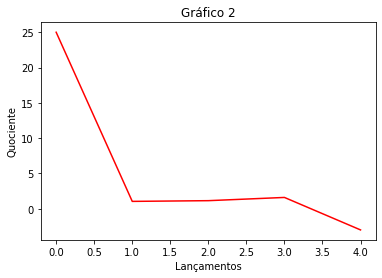

In [ ]:
graf2 = plt.subplot();
graf2.plot(array2[:,0], array2[:,2], 'r');
graf2.set(title='Gráfico 2', xlabel='Lançamentos',ylabel='Quociente');

Vamos agora construir o gráfico da função Q(n) = 240×b^n

para b = 0,5 no mesmo eixo cartesiano que você usou anteriormente mas com uma cor diferente. Use uma calculadora para encontrar alguns valores como propostos na tabela abaixo:

In [ ]:
tabela3

[['Lançamento', 'Q(n) = 240×b^n'],
 [0, 25.0],
 [1, 12.5],
 [2, 6.25],
 [3, 3.125],
 [4, 1.5625]]

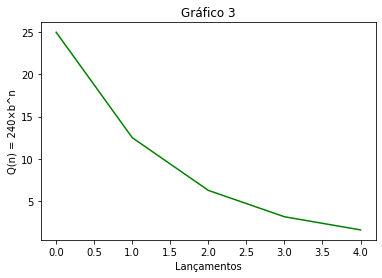

In [ ]:
graf3 = plt.subplot();
graf3.plot(array3[:,0], array3[:,1], 'g');
graf3.set(title='Gráfico 3', xlabel='Lançamentos',ylabel='Q(n) = 240×b^n');

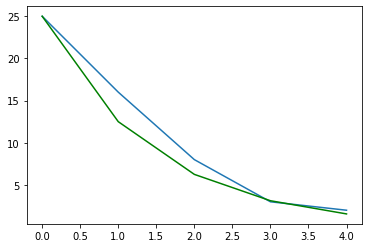

In [ ]:
graf4 = plt.subplot();
graf4.plot(array1[:,0], array1[:,1]);
graf4.plot(array1[:,0], array3[:,1], 'g');